In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img = plt.imread('ax.jpg')

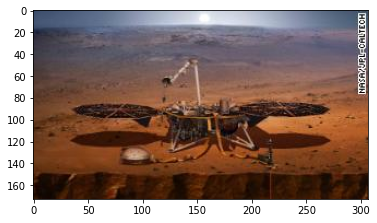

In [16]:
plt.imshow(img)

In [47]:
img.shape

(173, 307, 3)

In [48]:
img.ndim

3

In [49]:
img[:, :, 0]

array([[ 57,  57,  58, ...,  71,  70,  60],
       [ 57,  58,  59, ...,  56,  63,  74],
       [ 58,  59,  59, ...,  98,  56,  68],
       ...,
       [ 42,  38,  38, ..., 102, 102,  70],
       [ 48,  46,  46, ...,  87,  76,  53],
       [ 51,  50,  52, ...,  93,  70,  54]], dtype=uint8)

In [50]:
img[:, :, 0].shape

(173, 307)

In [51]:
img_array = img / 255

In [52]:
img_array.max(), img_array.min()

(1.0, 0.0)

In [53]:
img_array.dtype

dtype('float64')

In [54]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]


In [55]:
 from numpy import linalg

In [56]:
img_gray = img_array @ [0.2126, 0.7152, 0.0722]

In [57]:
img_gray.shape

(173, 307)

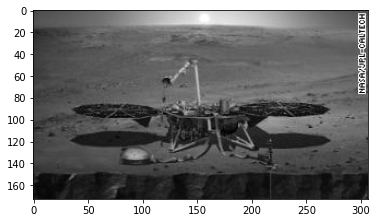

In [58]:
plt.imshow(img_gray, cmap="gray")

In [59]:
 U, s, Vt = linalg.svd(img_gray)

In [60]:
U.shape, s.shape, Vt.shape

((173, 173), (173,), (307, 307))

In [64]:
Sigma = np.zeros((173, 173))
for i in range(173):
    Sigma[i, i] = s[i]

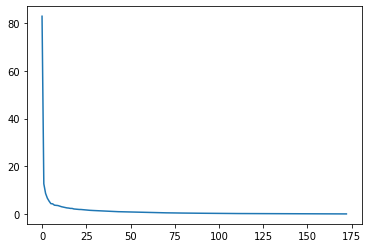

In [69]:
plt.plot(s)

In [70]:
 k = 10

In [72]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]

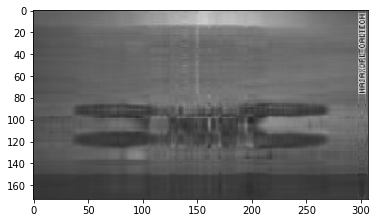

In [73]:
 plt.imshow(approx, cmap="gray")

In [74]:
img_array.shape

(173, 307, 3)

In [76]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 173, 307)

In [77]:
U, s, Vt = linalg.svd(img_array_transposed)

In [78]:
U.shape, s.shape, Vt.shape

((3, 173, 173), (3, 173), (3, 307, 307))

In [84]:
Sigma = np.zeros((3, 173, 307))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [87]:
reconstructed = U @ Sigma @ Vt
reconstructed.shape


(3, 173, 307)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


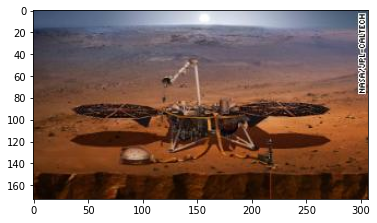

In [86]:
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))

In [88]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]

In [89]:
approx_img.shape

(3, 173, 307)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


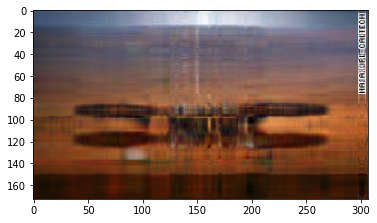

In [90]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))